In [1]:
!pip install cleanvision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.5/51.5 kB 822.8 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 10.7 MB/s eta 0:00:00


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import shutil
import cv2
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from cleanvision.imagelab import Imagelab

In [ ]:
import os
import cv2
import shutil
import matplotlib.pyplot as plt
from tqdm import tqdm
from cleanvision.imagelab import Imagelab

def get_title(fpath):
    return '/'.join(fpath.split('/')[4:])

def resize_img(img):
    img_height = 150
    img_width = int((img_height / img.shape[0]) * img.shape[1])
    return cv2.resize(img, (img_width, img_height))

def show_dups(dups, length, sdir):
    height = (length + 1) * 4
    plt.figure(figsize=(15, height))  # width, height
    for i in range(length):
        for j, path in enumerate(dups[i]):
            img = cv2.imread(path)
            img = resize_img(img)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.subplot(length, 2, i * 2 + j + 1)
            title = path.replace(sdir, '')
            plt.title(title, color='blue', fontsize=14)
            plt.axis('off')
            plt.imshow(img)
    plt.show()

def move_duplicates(dup_list, duplicates_dir):
    if not os.path.exists(duplicates_dir):
        os.makedirs(duplicates_dir)
    for file_path in dup_list:
        new_path = os.path.join(duplicates_dir, os.path.basename(file_path))
        shutil.move(file_path, new_path)
        print(f"Moved '{file_path}' to '{new_path}'")

def analyze_dataset(sdir):
    duplicates_dir = os.path.join(sdir, "duplicates")  # Path for storing duplicates
    if not os.path.exists(sdir):
        print(f"Error: The directory {sdir} does not exist.")
        return
    if not os.listdir(sdir):
        print(f"Error: The directory {sdir} is empty.")
        return

    try:
        imagelab = Imagelab(sdir)
        imagelab.find_issues()
        print(imagelab.issue_summary)
    except Exception as e:
        print(f"Failed to initialize Imagelab with directory {sdir}: {e}")
        return

    delete_list = []
    for issue_type in ['exact_duplicates', 'near_duplicates']:
        duplicates = list(imagelab.info[issue_type]['sets'])
        if not duplicates:
            print(f'No {issue_type.replace("_", " ")} were found.')
        else:
            plist = []
            for ed in duplicates:
                for j in range(1, len(ed)):
                    plist.append([ed[0], ed[j]])

            print(f'There are {len(plist)} pairs of {issue_type.replace("_", " ")}, displaying first few...')
            show_dups(plist[:min(len(plist), 5)], min(len(plist), 5), sdir)  # Show a few for example

            move_duplicates([p[1] for p in plist], duplicates_dir)  # Move duplicates

    print('***** Data set processing is completed *****')
# Usage example, adjust the directories as needed:
analyze_dataset("/notebooks/attention/coral_original")


Reading images from /notebooks/attention/coral_original
Checking for dark, light, odd_aspect_ratio, low_information, exact_duplicates, near_duplicates, blurry, grayscale, odd_size images ...


  0%|          | 0/902 [00:00<?, ?it/s]

In [19]:
import os

def count_files_in_directory(directory):
    """
    Counts the number of files in the specified directory.

    Args:
    directory (str): The path to the directory whose files are to be counted.

    Returns:
    int: The number of files in the directory.
    """
    if not os.path.exists(directory):
        print(f"Error: The directory {directory} does not exist.")
        return 0
    if not os.path.isdir(directory):
        print(f"Error: The path {directory} is not a directory.")
        return 0
    
    file_count = len([name for name in os.listdir(directory) if os.path.isfile(os.path.join(directory, name))])
    return file_count

# Usage example
directory_path = '/notebooks/attention/coral_original/duplicates'
file_count = count_files_in_directory(directory_path)
print(f'There are {file_count} files in the directory "{directory_path}".')


There are 21 files in the directory "/notebooks/attention/coral_original/duplicates".


Reading images from /notebooks/attention/coral_original
Checking for dark, light, odd_aspect_ratio, low_information, exact_duplicates, near_duplicates, blurry, grayscale, odd_size images ...


  0%|          | 0/923 [00:00<?, ?it/s]

  0%|          | 0/923 [00:00<?, ?it/s]

Issue checks completed. 54 issues found in the dataset. To see a detailed report of issues found, use imagelab.report().
         issue_type  num_images
0  exact_duplicates          36
1   near_duplicates           8
2          odd_size           7
3            blurry           2
4              dark           1
5             light           0
6  odd_aspect_ratio           0
7   low_information           0
8         grayscale           0
There are 18 pairs of exact duplicates, displaying first few...


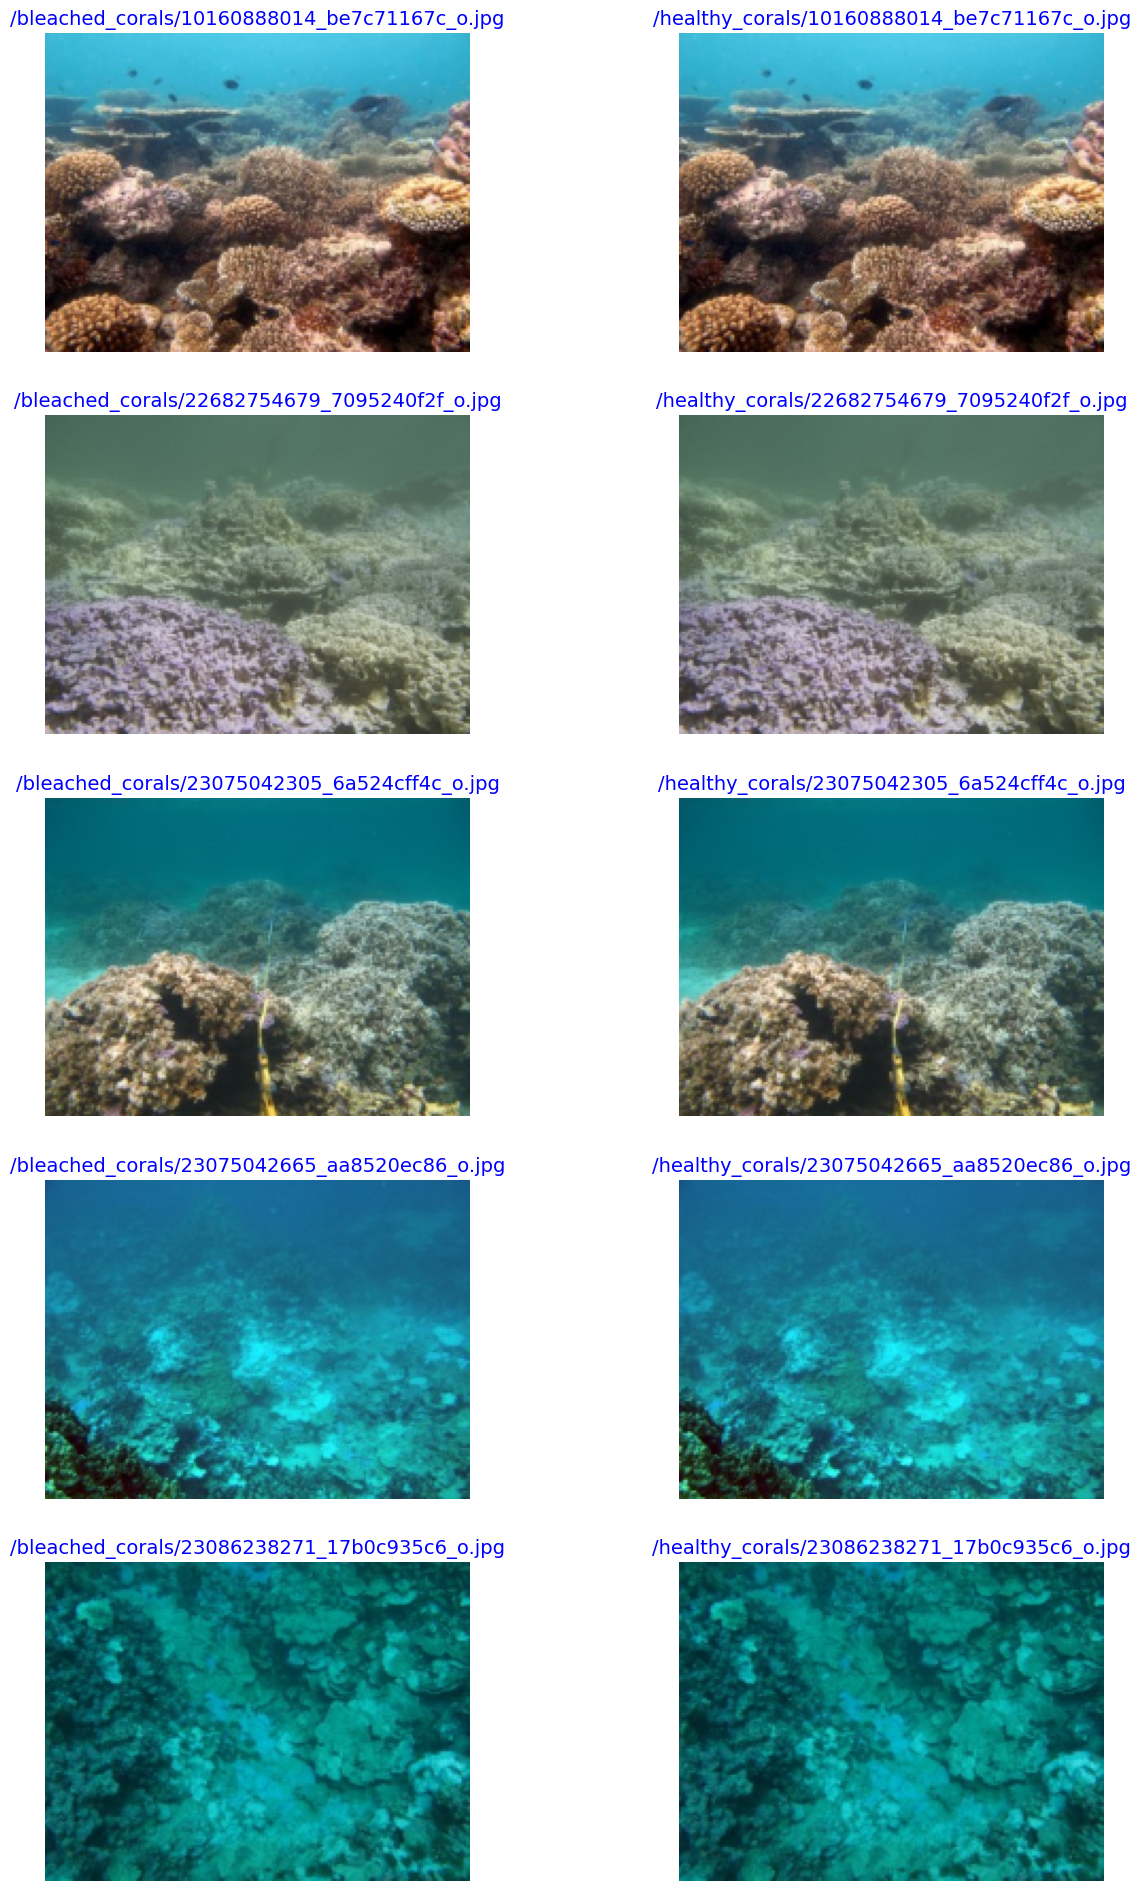

Moved '/notebooks/attention/coral_original/healthy_corals/10160888014_be7c71167c_o.jpg' to '/notebooks/attention/coral_original/duplicates/10160888014_be7c71167c_o.jpg'
Moved '/notebooks/attention/coral_original/healthy_corals/22682754679_7095240f2f_o.jpg' to '/notebooks/attention/coral_original/duplicates/22682754679_7095240f2f_o.jpg'
Moved '/notebooks/attention/coral_original/healthy_corals/23075042305_6a524cff4c_o.jpg' to '/notebooks/attention/coral_original/duplicates/23075042305_6a524cff4c_o.jpg'
Moved '/notebooks/attention/coral_original/healthy_corals/23075042665_aa8520ec86_o.jpg' to '/notebooks/attention/coral_original/duplicates/23075042665_aa8520ec86_o.jpg'
Moved '/notebooks/attention/coral_original/healthy_corals/23086238271_17b0c935c6_o.jpg' to '/notebooks/attention/coral_original/duplicates/23086238271_17b0c935c6_o.jpg'
Moved '/notebooks/attention/coral_original/healthy_corals/27627673012_7a63b12bc9_o.jpg' to '/notebooks/attention/coral_original/duplicates/27627673012_7a63

[ WARN:0@2208.489] global loadsave.cpp:248 findDecoder imread_('/notebooks/attention/coral_original/bleached_corals/7174750970_0dd3823402_o.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2208.567] global loadsave.cpp:248 findDecoder imread_('/notebooks/attention/coral_original/healthy_corals/7174136896_96817e8eaa_o.jpg'): can't open/read file: check file path/integrity


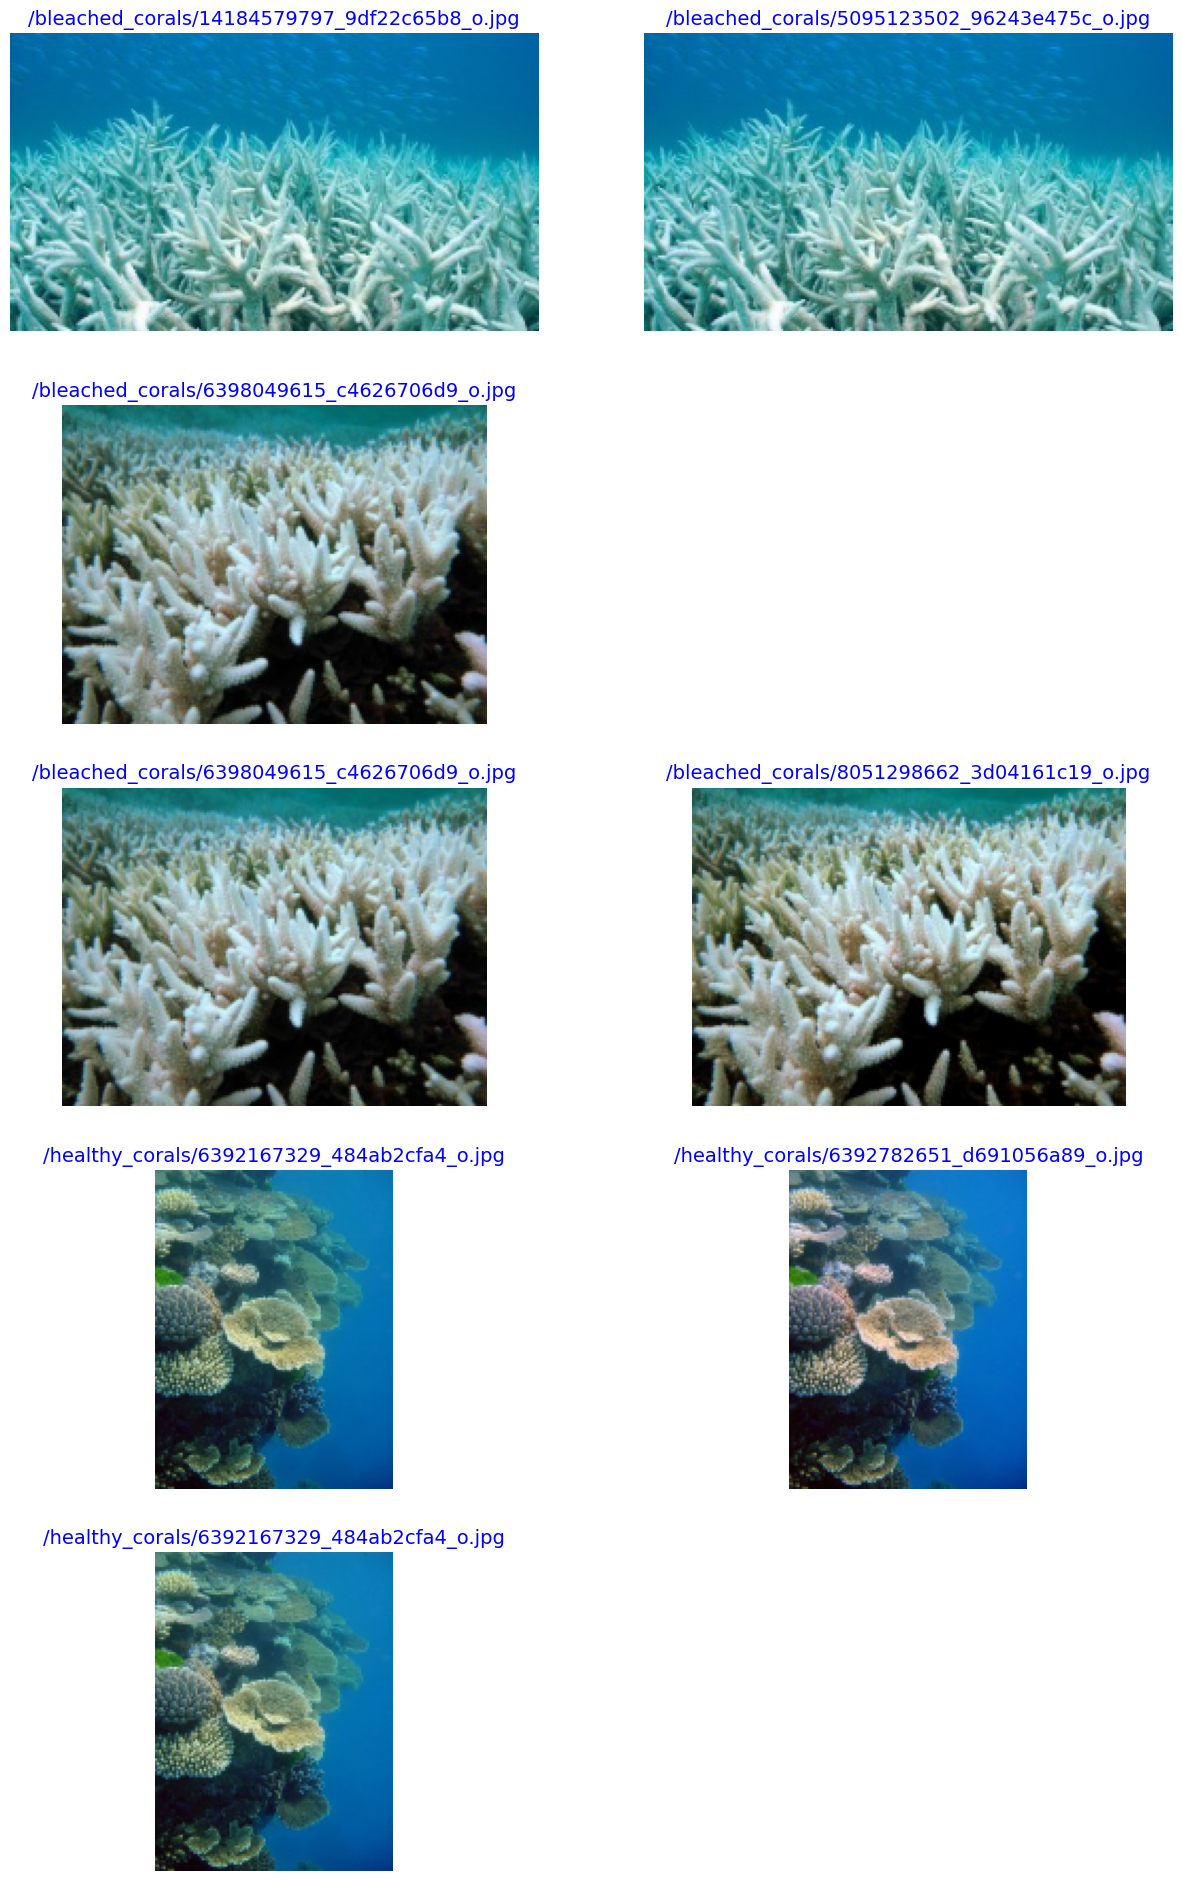

Moved '/notebooks/attention/coral_original/bleached_corals/5095123502_96243e475c_o.jpg' to '/notebooks/attention/coral_original/duplicates/5095123502_96243e475c_o.jpg'
Error: File does not exist /notebooks/attention/coral_original/bleached_corals/7174750970_0dd3823402_o.jpg
Moved '/notebooks/attention/coral_original/bleached_corals/8051298662_3d04161c19_o.jpg' to '/notebooks/attention/coral_original/duplicates/8051298662_3d04161c19_o.jpg'
Moved '/notebooks/attention/coral_original/healthy_corals/6392782651_d691056a89_o.jpg' to '/notebooks/attention/coral_original/duplicates/6392782651_d691056a89_o.jpg'
Error: File does not exist /notebooks/attention/coral_original/healthy_corals/7174136896_96817e8eaa_o.jpg
***** Data set processing is completed *****


In [17]:
import os
import cv2
import shutil
import matplotlib.pyplot as plt
from cleanvision.imagelab import Imagelab

def get_title(fpath):
    return '/'.join(fpath.split('/')[4:])

def resize_img(img):
    img_height = 150
    img_width = int((img_height / img.shape[0]) * img.shape[1])
    return cv2.resize(img, (img_width, img_height))

def show_dups(dups, length, sdir):
    height = (length + 1) * 4
    plt.figure(figsize=(15, height))
    for i in range(length):
        for j, path in enumerate(dups[i]):
            img = cv2.imread(path)
            if img is None:
                print(f"Error: Could not load image at {path}")
                continue  # Skip this image
            img = resize_img(img)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.subplot(length, 2, i * 2 + j + 1)
            title = path.replace(sdir, '')
            plt.title(title, color='blue', fontsize=14)
            plt.axis('off')
            plt.imshow(img)
    plt.show()

def move_duplicates(dup_list, duplicates_dir):
    if not os.path.exists(duplicates_dir):
        os.makedirs(duplicates_dir)
    for file_path in dup_list:
        if not os.path.isfile(file_path):
            print(f"Error: File does not exist {file_path}")
            continue  # Skip non-existent files
        new_path = os.path.join(duplicates_dir, os.path.basename(file_path))
        shutil.move(file_path, new_path)
        print(f"Moved '{file_path}' to '{new_path}'")

def analyze_dataset(sdir):
    duplicates_dir = os.path.join(sdir, "duplicates")
    if not os.path.exists(sdir):
        print(f"Error: The directory {sdir} does not exist.")
        return
    if not os.listdir(sdir):
        print(f"Error: The directory {sdir} is empty.")
        return

    try:
        imagelab = Imagelab(sdir)
        imagelab.find_issues()
        print(imagelab.issue_summary)
    except Exception as e:
        print(f"Failed to initialize Imagelab with directory {sdir}: {e}")
        return

    delete_list = []
    for issue_type in ['exact_duplicates', 'near_duplicates']:
        duplicates = list(imagelab.info[issue_type]['sets'])
        if not duplicates:
            print(f'No {issue_type.replace("_", " ")} were found.')
        else:
            plist = []
            for ed in duplicates:
                for j in range(1, len(ed)):
                    plist.append([ed[0], ed[j]])

            print(f'There are {len(plist)} pairs of {issue_type.replace("_", " ")}, displaying first few...')
            show_dups(plist[:min(len(plist), 5)], min(len(plist), 5), sdir)  # Show a few for example

            move_duplicates([p[1] for p in plist], duplicates_dir)  # Move duplicates

    print('***** Data set processing is completed *****')

# Usage example, adjust the directories as needed:
analyze_dataset("/notebooks/attention/coral_original")

In [20]:
import os

def count_files_in_directory(directory):
    """
    Counts the number of files in the specified directory.

    Args:
    directory (str): The path to the directory whose files are to be counted.

    Returns:
    int: The number of files in the directory.
    """
    if not os.path.exists(directory):
        print(f"Error: The directory {directory} does not exist.")
        return 0
    if not os.path.isdir(directory):
        print(f"Error: The path {directory} is not a directory.")
        return 0
    
    # Count only files, excluding subdirectories
    file_count = len([name for name in os.listdir(directory) if os.path.isfile(os.path.join(directory, name))])
    return file_count

# Define the base directory where these coral directories are located
base_directory = "/notebooks/attention/coral_original"

# Specify the paths to the coral directories
healthy_corals_dir = os.path.join(base_directory, "healthy_corals")
bleached_corals_dir = os.path.join(base_directory, "bleached_corals")

# Count files in each directory
healthy_count = count_files_in_directory(healthy_corals_dir)
bleached_count = count_files_in_directory(bleached_corals_dir)

# Print the results
print(f"There are {healthy_count} files in the '{healthy_corals_dir}' directory.")
print(f"There are {bleached_count} files in the '{bleached_corals_dir}' directory.")


There are 422 files in the '/notebooks/attention/coral_original/healthy_corals' directory.
There are 480 files in the '/notebooks/attention/coral_original/bleached_corals' directory.
